# Countries of the World - World Fact Sheet


In [79]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [80]:
world = pd.read_csv("world_GDP.csv",decimal=',')

In [81]:
world.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


# Data Pre-processing

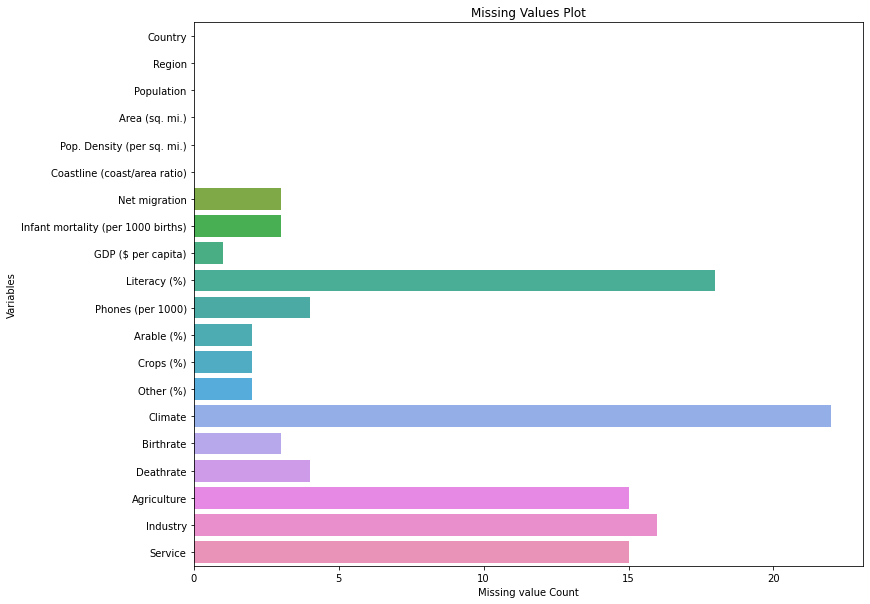

In [82]:
plt.figure(figsize=(12,10))
sns.barplot(data=world.isnull().sum().reset_index(), y='index',x=0)
plt.ylabel('Variables')
plt.title('Missing Values Plot')
plt.xlabel('Missing value Count')
plt.show()

## The missing data is filled using the median of the region that a country belongs, as countries that are close geologically are often similar in many ways

In [83]:
for col in world.columns.values:
    if world[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = world.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = world.groupby('Region')[col].median()
    for region in world['Region'].unique():
        world[col].loc[(world[col].isnull())&(world['Region']==region)] = guess_values[region]

C:\Users\Abhishek\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [84]:
world.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

# Data Exploration
## Top Countries with highest GDP per capita

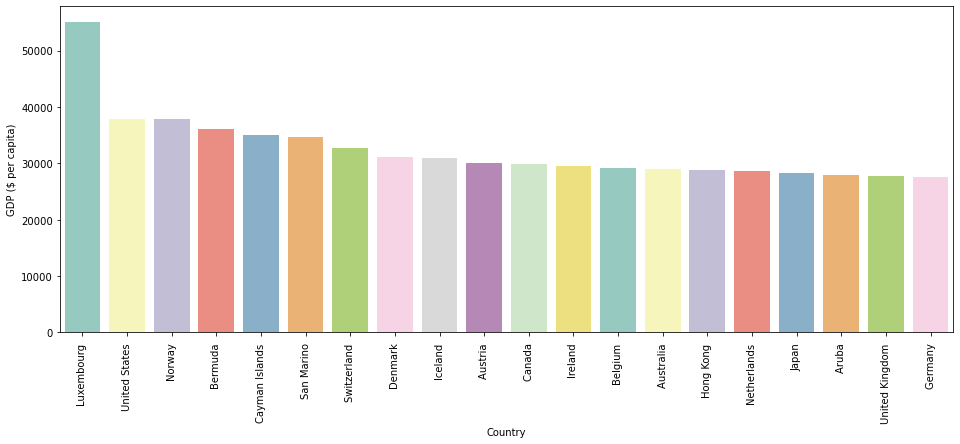

In [85]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country',y='GDP ($ per capita)',data=world.sort_values('GDP ($ per capita)',ascending=False).head(20), palette='Set3')
plt.xticks(rotation=90)
plt.show()

## Top Countries with lowest GDP per capita

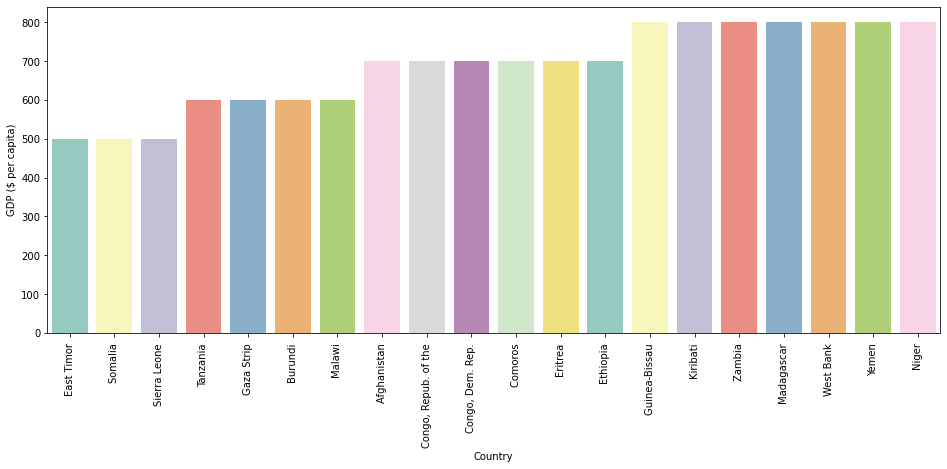

In [86]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country',y='GDP ($ per capita)',data=world.sort_values('GDP ($ per capita)',ascending=True).head(20), palette='Set3')
plt.xticks(rotation=90)
plt.show()

# Top Countries with highest Total GDP

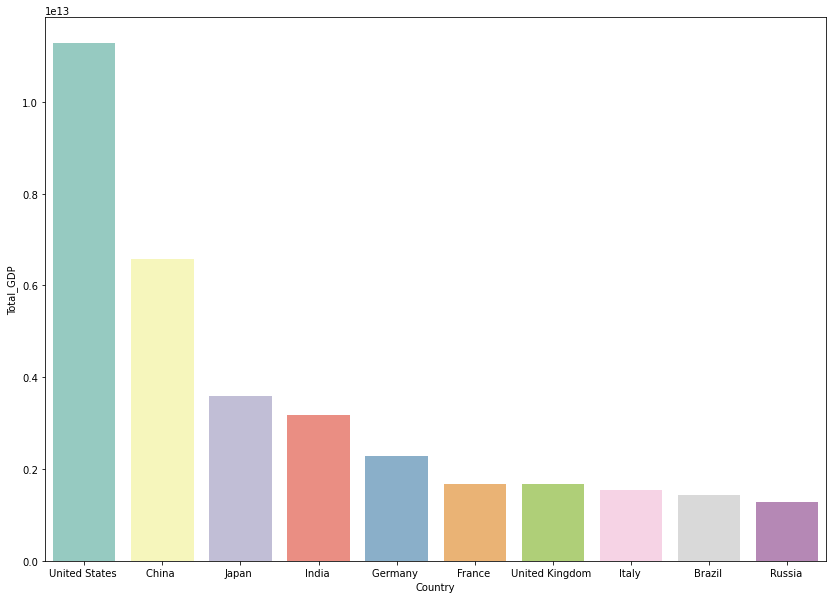

In [87]:
world['Total_GDP'] = world['GDP ($ per capita)'] * world['Population']
plt.figure(figsize=(14,10))

sns.barplot(x='Country',y='Total_GDP',data=world.sort_values('Total_GDP',ascending=False).head(10),palette='Set3')

# Share of Total GDP of Top 25 countries

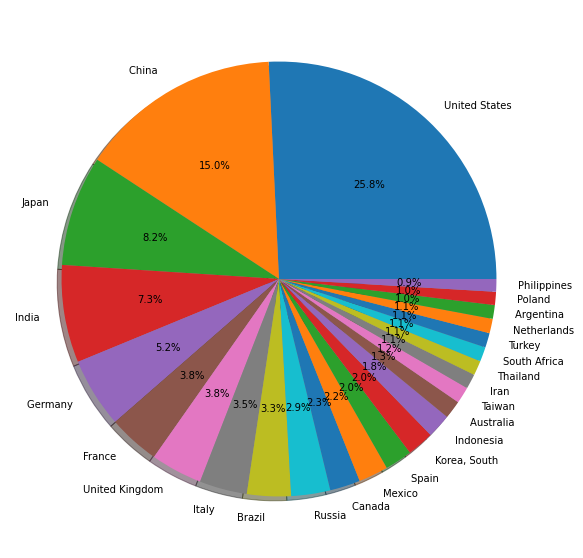

In [88]:
plt.subplots(figsize=(14,10))
gdp=world.sort_values('Total_GDP',ascending=False).head(25)
plt.pie(gdp['Total_GDP'],labels=gdp['Country'],autopct='%1.1f%%',shadow=True);

#  Total GDP per capita by Region

Text(0.5, 1.0, 'GDP BY REGİON')

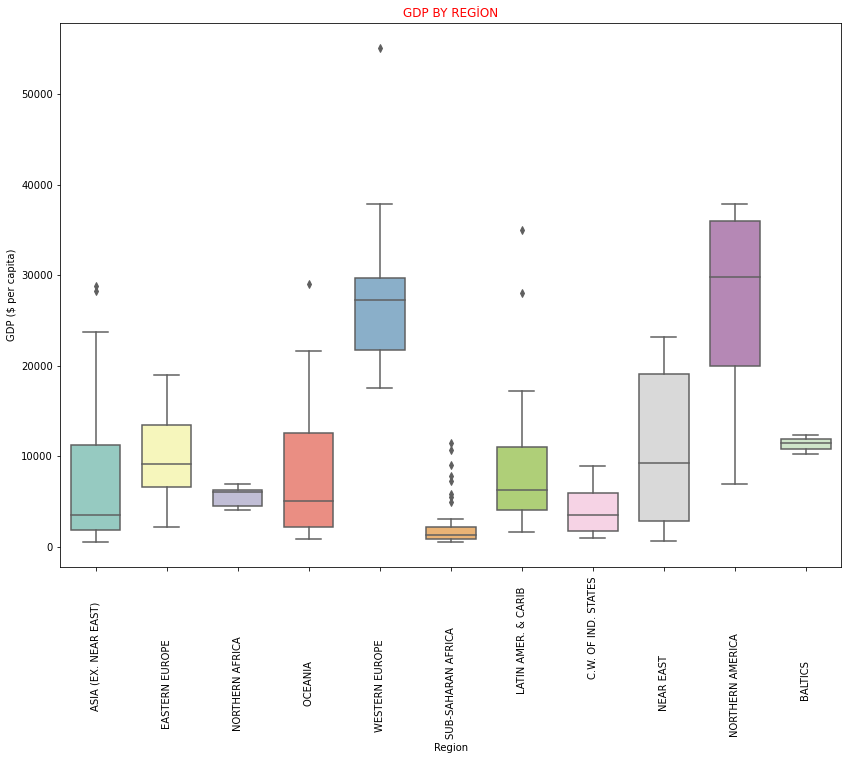

In [89]:
plt.figure(figsize=(14,10))
sns.boxplot(x="Region",y="GDP ($ per capita)",data=world,width=0.7,palette="Set3",fliersize=5)
plt.xticks(rotation=90)
plt.title("GDP BY REGİON",color="red")

# Correlation between Variables

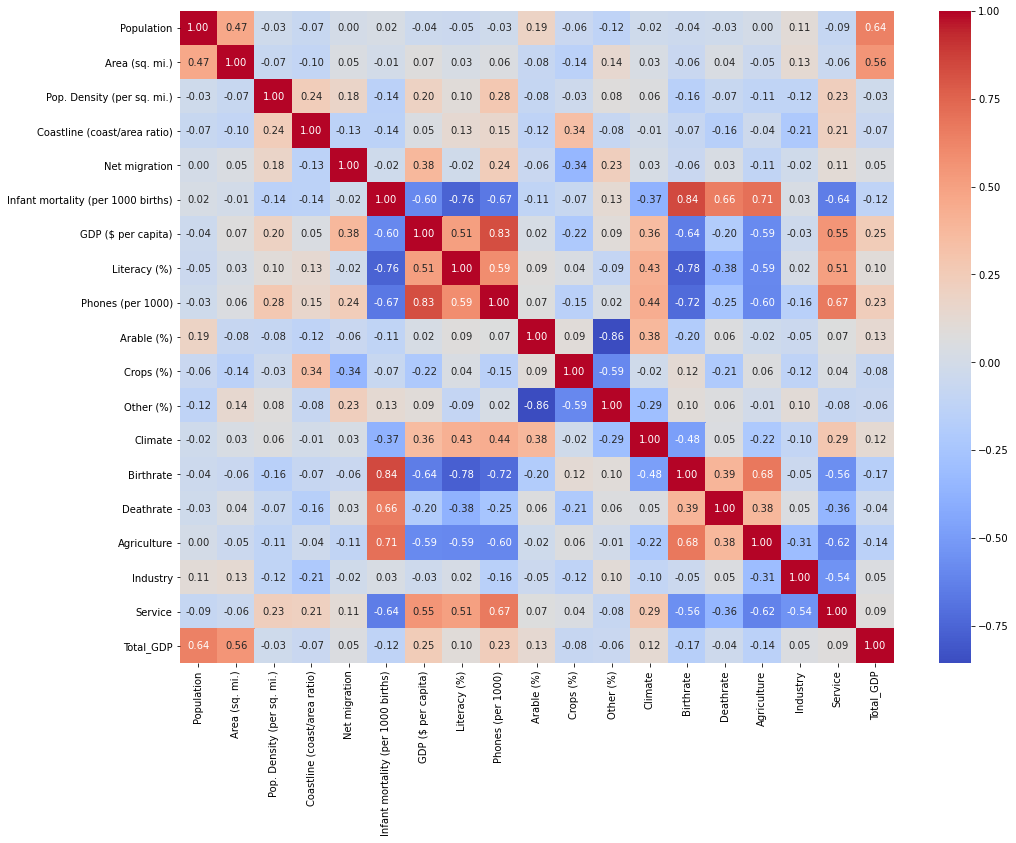

In [90]:
plt.figure(figsize=(16,12))
sns.heatmap(data=world.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

# Top Factors affecting GDP per capita
## We pick the five columns that mostly correlate to GDP per capita and make scatter plots.

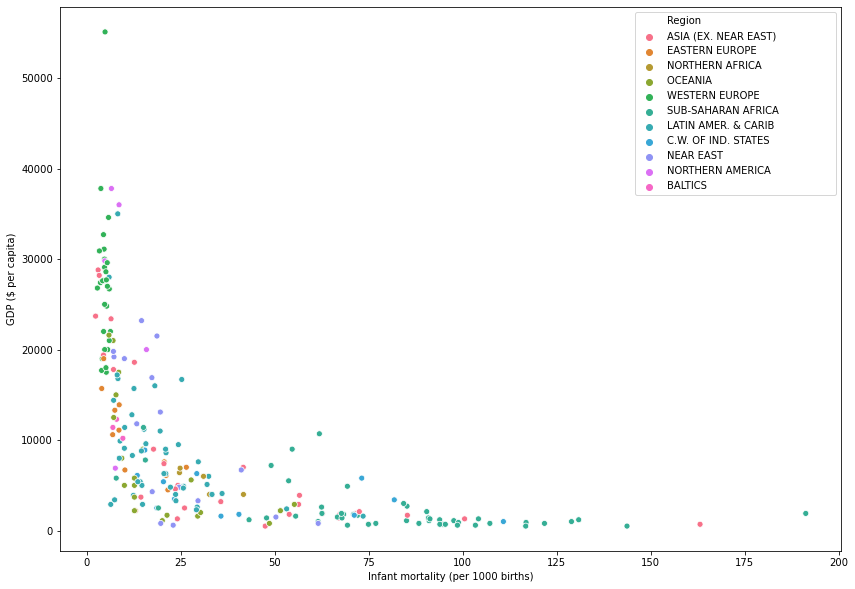

In [91]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=world,x='Infant mortality (per 1000 births)',y='GDP ($ per capita)',hue='Region')

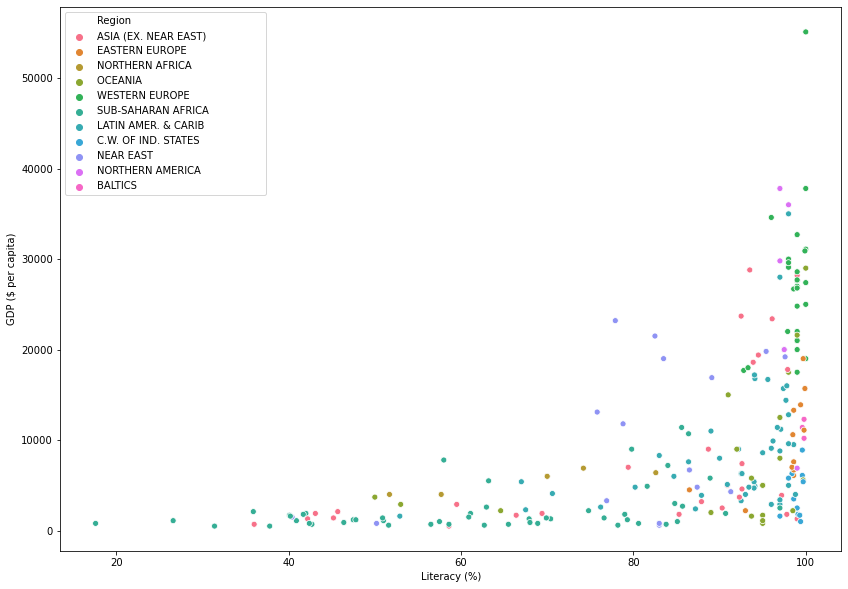

In [92]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=world,x='Literacy (%)',y='GDP ($ per capita)',hue='Region')

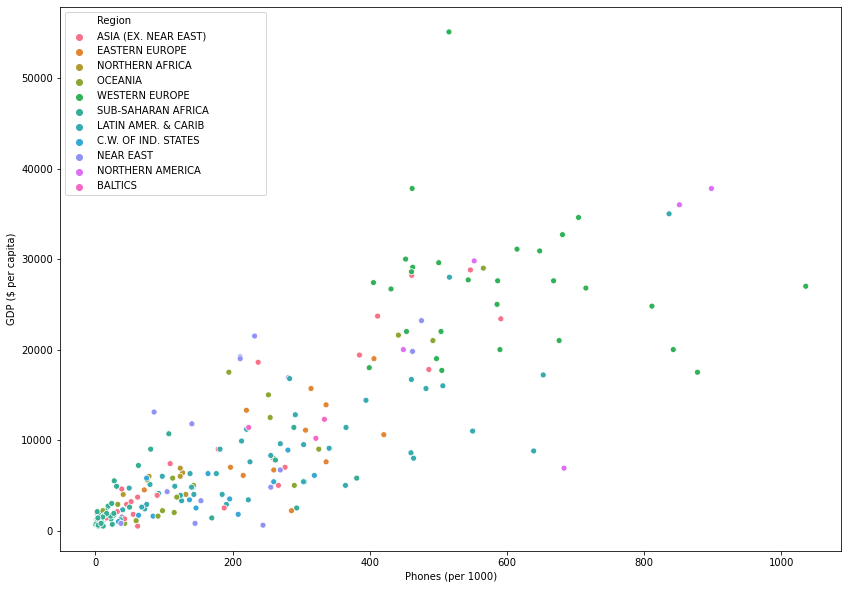

In [93]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=world,x='Phones (per 1000)',y='GDP ($ per capita)',hue='Region')

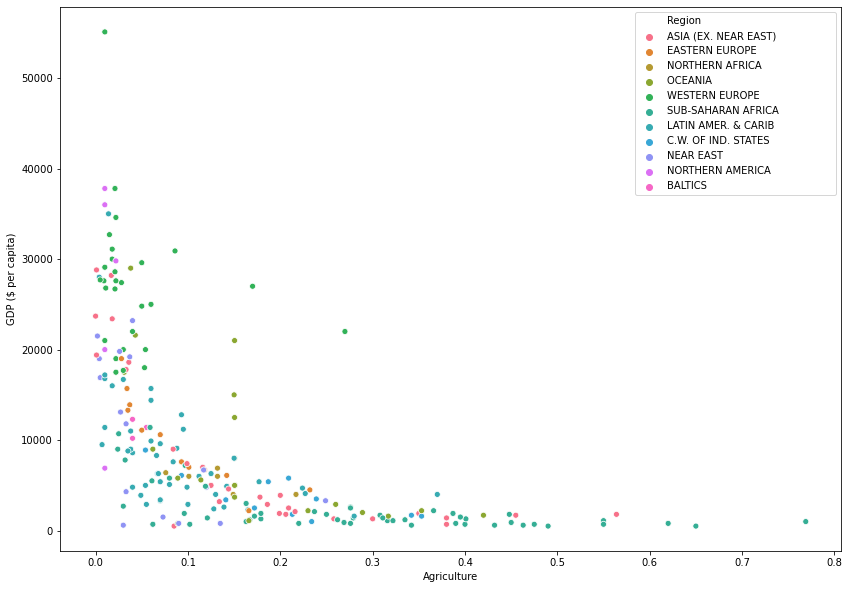

In [94]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=world,x='Agriculture',y='GDP ($ per capita)',hue='Region')

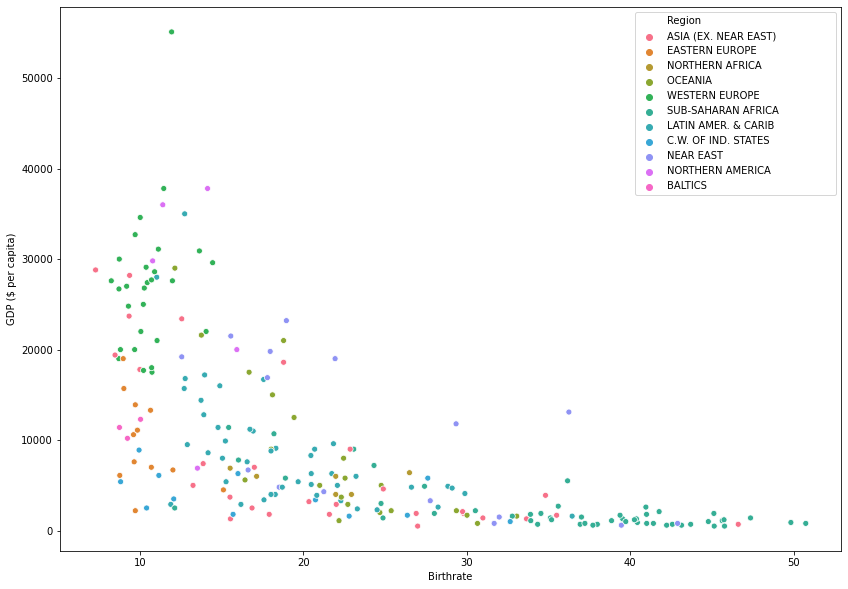

In [95]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=world,x='Birthrate',y='GDP ($ per capita)',hue='Region')

# Birthrate and Deathrate of Top 100 Countries

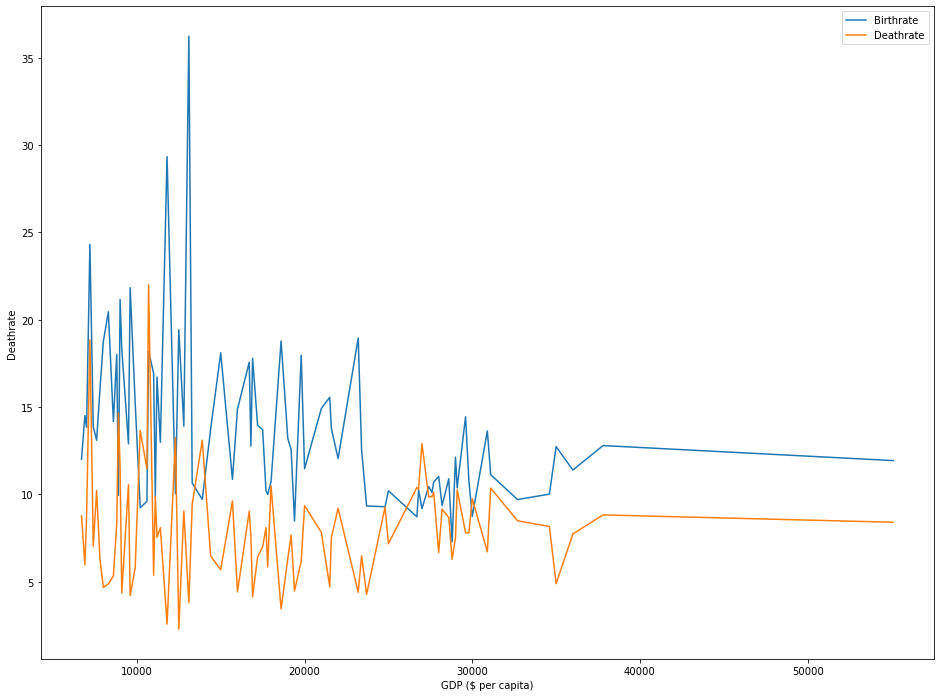

In [96]:
plt.figure(figsize=(16,12))
sns.lineplot(data=world.sort_values('GDP ($ per capita)',ascending=False).head(100),x='GDP ($ per capita)',y='Birthrate',ci=None,label='Birthrate')
sns.lineplot(data=world.sort_values('GDP ($ per capita)',ascending=False).head(100),x='GDP ($ per capita)',y='Deathrate',ci=None,label='Deathrate')

# Birthrate and Deathrate of Last 100 Countries

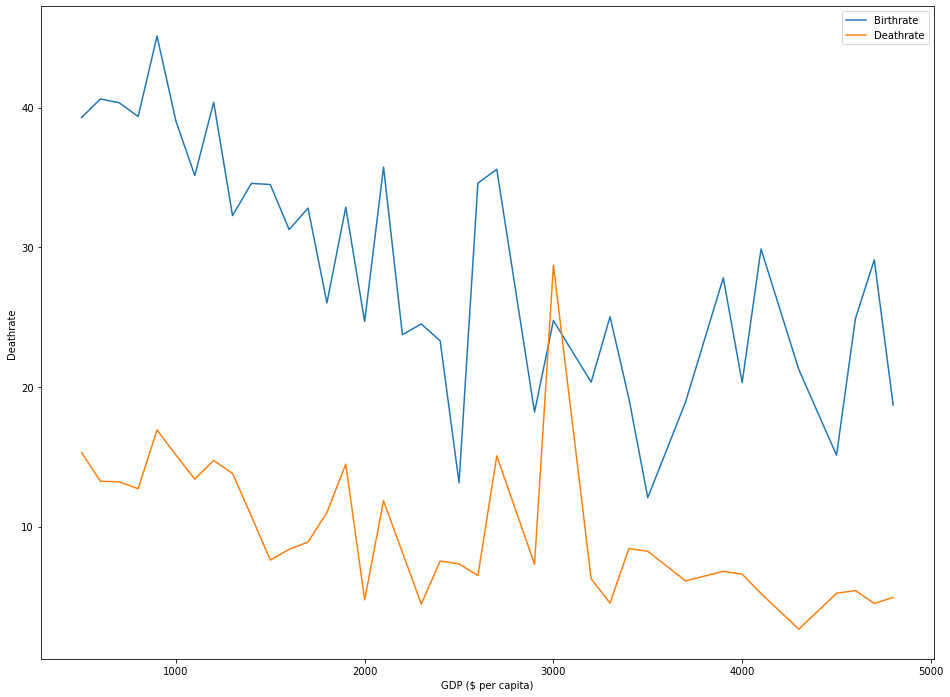

In [97]:
plt.figure(figsize=(16,12))
sns.lineplot(data=world.sort_values('GDP ($ per capita)',ascending=True).head(100),x='GDP ($ per capita)',y='Birthrate',ci=None,label='Birthrate')
sns.lineplot(data=world.sort_values('GDP ($ per capita)',ascending=True).head(100),x='GDP ($ per capita)',y='Deathrate',ci=None,label='Deathrate')

#  Comparison of the economy structure for the ten countries with highest total GDP

<Figure size 1152x864 with 0 Axes>

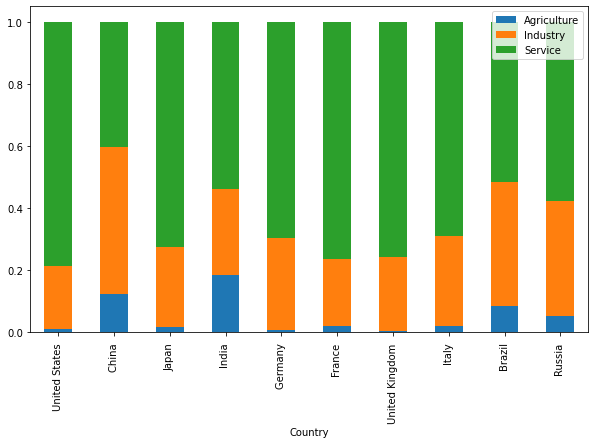

In [98]:
plt.figure(figsize=(16,12))
gdp[['Country','Agriculture', 'Industry', 'Service']].set_index('Country').head(10).plot.bar(stacked=True,figsize=(10,6))

# Modeling
# Training and Testing

In [99]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [100]:
LE = LabelEncoder()
world['Region_label'] = LE.fit_transform(world['Region'])
world['Climate_label'] = LE.fit_transform(world['Climate'])
world.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Total_GDP,Region_label,Climate_label
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,87.65,1.0,46.60,20.34,0.3800,0.240,0.380,2.173990e+10,0,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,74.49,3.0,15.11,5.22,0.2320,0.188,0.579,1.611745e+10,3,4
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,96.53,1.0,17.14,4.61,0.1010,0.600,0.298,1.975805e+11,6,0
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,75.00,2.0,22.46,3.27,0.1505,0.171,0.644,4.623520e+08,8,2
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,97.78,3.0,8.71,6.25,0.0220,0.245,0.720,1.352819e+09,10,4


In [101]:
train, test = train_test_split(world, test_size=0.3, shuffle=True)
training_features = ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate',
       'Deathrate', 'Region_label',
       'Climate_label']
target = 'GDP ($ per capita)'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [102]:
print(train_X.shape) 
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(158, 15)
(158,)
(69, 15)
(69,)


# Linear Regression Model

In [103]:
model1 = LinearRegression()
model1.fit(train_X, train_Y)
train_pred_Y = model1.predict(train_X)
test_pred_Y = model1.predict(test_X)

In [104]:
from sklearn.metrics import r2_score

In [105]:
print('Training Score : ',model1.score(train_X,train_Y))
print(f'Test score : ',r2_score(test_pred_Y,test_Y))

Training Score :  0.7601403523483664
Test score :  0.7127959092343915


## Training Score : 76.25%
## Test score :  64.57%

# Visualization of Results

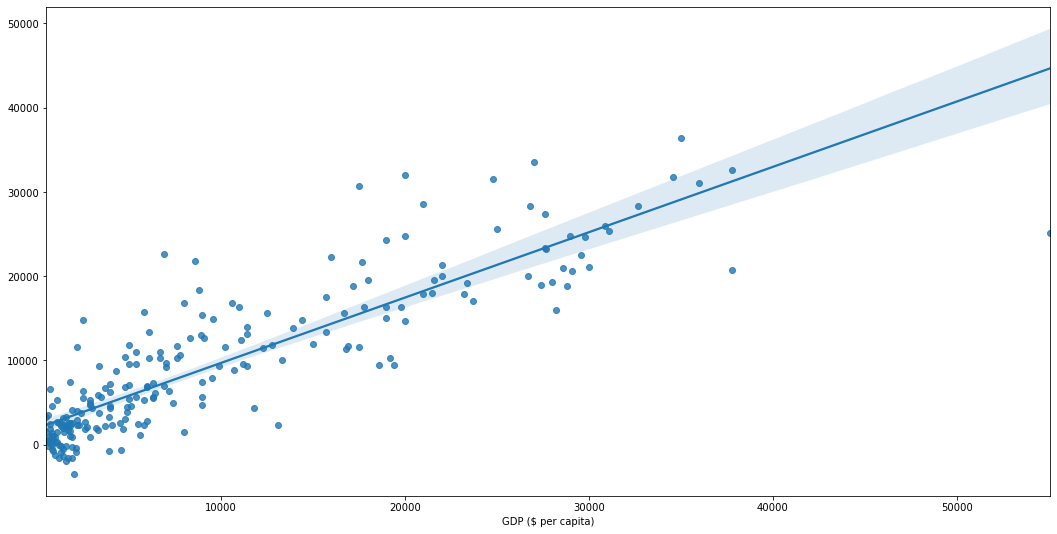

In [106]:
plt.figure(figsize=(18,9))
whole=model1.predict(world[training_features])
sns.regplot(x=world[target],y=whole) 

# Random Forest Regressor

In [107]:
model = RandomForestRegressor(n_estimators = 100,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)

In [108]:
print('Training Score :',model.score(train_X,train_Y))
print(f'Test score : ',r2_score(test_pred_Y,test_Y))

Training Score : 0.877028242474283
Test score :  0.8610412967219985


## Training Score : 89.21%
## Test score :  84.29%

# Visualization of Results

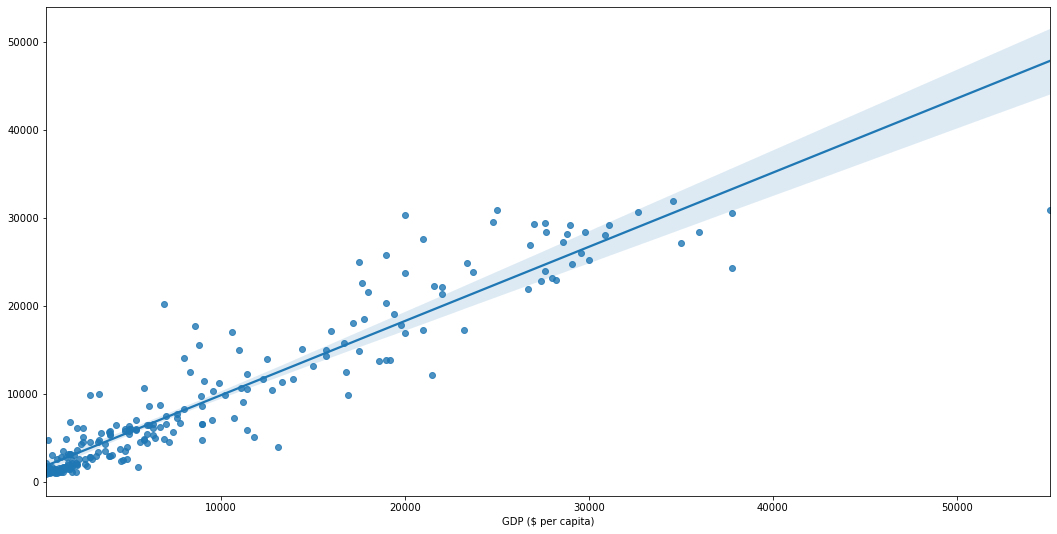

In [109]:
plt.figure(figsize=(18,9))
whole=model.predict(world[training_features])
sns.regplot(x=world[target],y=whole) 



# We will try to predict GDP per capita of Two Imaginary Countries
# 1.DreamLand : Better than Average in all features
# 2.MeanLand : Mean of all Countries

In [110]:
df = pd.DataFrame(columns = training_features)

In [77]:
df = df.append({'Population':500000000, 'Area (sq. mi.)':3287263,
       'Pop. Density (per sq. mi.)':152.0, 'Coastline (coast/area ratio)':2.0,
       'Net migration':0.0, 'Infant mortality (per 1000 births)':5,
       'Literacy (%)':99.0, 'Phones (per 1000)':1000,
       'Arable (%)':60, 'Crops (%)':10, 'Other (%)':30, 'Birthrate':10,
       'Deathrate':5, 'Region_label':0,
       'Climate_label':0},ignore_index = True) 
df = df.append({'Population':28740280, 'Area (sq. mi.)':598227,
       'Pop. Density (per sq. mi.)':379, 'Coastline (coast/area ratio)':21.16,
       'Net migration':0.03, 'Infant mortality (per 1000 births)':35.28,
       'Literacy (%)':83.58, 'Phones (per 1000)':234.62,
       'Arable (%)':13.7, 'Crops (%)':4.3, 'Other (%)':81.67, 'Birthrate':22.06,
       'Deathrate':9.19, 'Region_label':0,
       'Climate_label':0},ignore_index = True)
df

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Region_label,Climate_label
0,500000000.0,3287263.0,152.0,2.00,0.00,5.00,99.00,1000.00,60.0,10.0,30.00,10.00,5.00,0.0,0.0
1,28740280.0,598227.0,379.0,21.16,0.03,35.28,83.58,234.62,13.7,4.3,81.67,22.06,9.19,0.0,0.0


In [78]:
model.predict(df)

array([22986.26229326,  6155.58067896])

# Predicted GDP per capita
# DreamLand :  \$20946.20
# MeanLand : \$5438.23

# Thank You